In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Visualize mask example

Number of masks: 105
Shape of each mask array: (480, 640)
Total frames loaded: 104


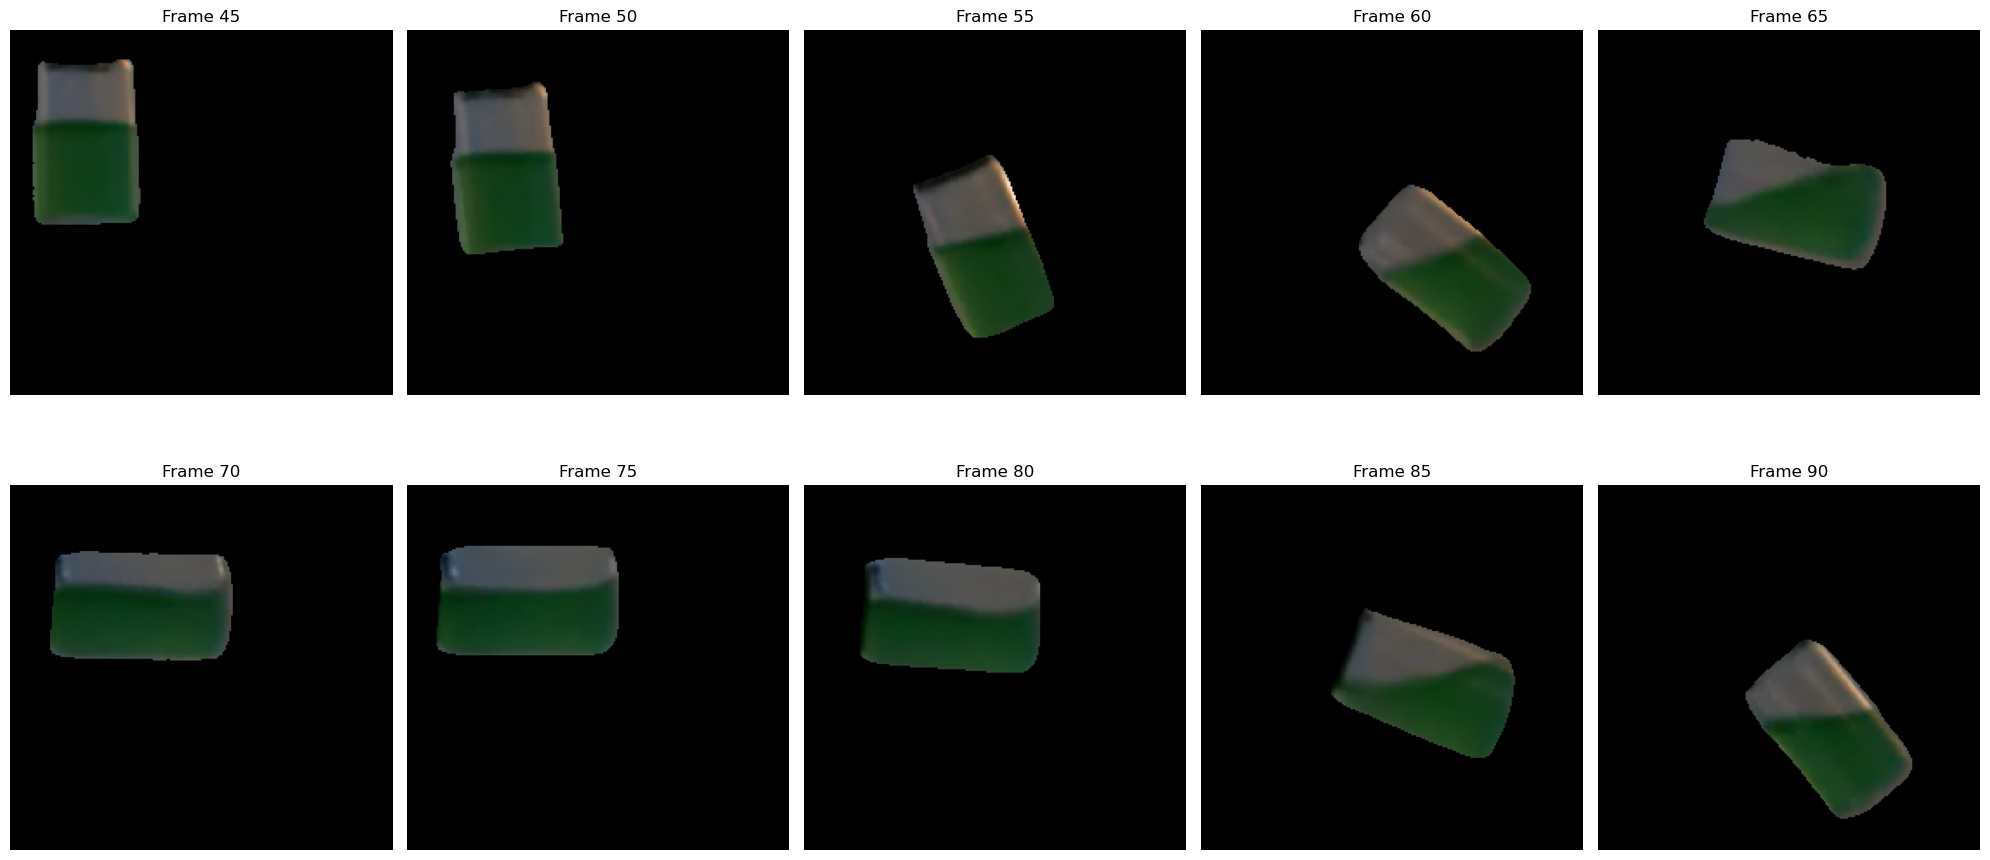

In [12]:
data_path = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, os.path.pardir, 'data')))
if (not (data_path in sys.path)):
    sys.path.append(data_path)

mask_path = os.path.join(data_path, 'masks.npy')
masks = np.load(mask_path)
print(f"Number of masks: {len(masks)}")

# Each element in the masks array is a 2D numpy array with shape (480, 640)
print(f"Shape of each mask array: {masks[0].shape}")

# Load the video P0_1.avi located in the data/raw folder
video_path = os.path.join(data_path, 'raw_modified', '1.0_1.avi')
cap = cv2.VideoCapture(video_path)

# Initialize an empty list to store the frames
frames = []

# Read and store each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

# Release the video capture object
cap.release()

# Check the number of frames loaded
print(f"Total frames loaded: {len(frames)}")

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for ax, index in zip(axes, range(45, 105, 5)):
    mask = masks[index]
    frame = frames[index]
    
    # Apply the mask to the frame
    masked_frame = cv2.bitwise_and(frame, frame, mask=mask.astype(np.uint8))
    masked_frame = masked_frame[260:470, 300:520]
    
    # Display the masked image
    ax.imshow(masked_frame)
    ax.set_title(f"Frame {index}")
    ax.axis('off')

plt.tight_layout()
plt.show()